In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
Lx = 10.0
Ly = 5.0
dx = 0.1
dy = 0.1
D = 1.0
dt = 0.001
nx = int(Lx / dx)
ny = int(Ly / dy)
nt = 10000

 # a)

 FTCS-Scheme discritization in 2D is:
 
\begin{equation*}
u^{n+1}_j=u_j^n+\frac{D\Delta t}{\Delta x^2}(u_{j+1}^n-2u_j^n+u_{j-1}^n)+\frac{D\Delta t}{\Delta y^2}(u_{l+1}^n-2u_l^n+u_{l-1}^n)  \tag{1}
\end{equation*}

We analyze stability by

\begin{equation} 
\delta u_j^n=\xi(k)^ne^{ikj\Delta x}, \qquad \delta u_l^n=\xi(k)^ne^{ikl\Delta y}   \tag{2}
\end{equation}

 Inserting these into first equation, and setting $\Delta x=\Delta y=\Delta L$,  we get the following:

 \begin{equation}
\xi(k)=1-\frac{8D\Delta t}{\Delta L^2}\sin^2(\frac{k\Delta L}{2})     \tag{3}
 \end{equation}
To satisfy $|\xi(k)|<1$

\begin{equation}
-1<1-\frac{8D\Delta t}{\Delta L^2}\sin^2(\frac{k\Delta L}{2}) <1  \quad \Rightarrow \quad  2>\frac{8D\Delta t}{\Delta L^2}\sin^2(\frac{k\Delta L}{2}) >0
\end{equation}

Right hand side is always fulfilled and from the left hand side, we get

 \begin{equation}
 \frac{4D\Delta t}{\Delta L^2}<1     \tag{4}
 \end{equation}

We have choosen $D$, $\Delta t$ and $\Delta L$ such that the above equality holds
# b)/c)
Below is the initial conditions along x and y

In [3]:
pin = np.zeros((nx + 2, ny + 2))


def initial_first(p):
    pin_zeros = p
    return pin_zeros


def initial_second(p):
    p[:, 0] = 20
    p[:, -1] = 10
    return p


def initial_third(p):
    x = np.linspace(0, Lx, nx + 2)
    p[:, 0] = 20 + 0.5 * (x - 5) ** 2
    p[:, -1] = 10 - 0.3 * (x - 5) ** 2
    return p

def initial_forth_mein(p):
    p[:, 0] = 20
    p[:, -1] = 10
    x0, y0 = 2.5, 2.5
    #square_size=2
    R=1.0    #square_size/2
    sx1, sx2 = int((x0 - R) / dx), int((x0 + R) / dx)
    sy1, sy2 = int((y0 - R) / dy), int((y0 + R) / dy)
    p[sx1:sx2, sy1:sy2] = 0
    return p

def initial_forth(p):
    p[:, 0] = 20
    p[:, -1] = 10
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y, indexing="ij")
    mask = (1.5 < X) & (X < 3.5) & (1.5 < Y) & (Y < 3.5)
    p[1:-1, 1:-1][mask] = 0
    return p

Boundary conditions

In [4]:
def boundary_cond_first(p):
    p[0, :] = p[-2, :]  #  left along x
    p[-1, :] = p[1, :]  #  right along x
    p[:, 0] = p[:, -1]  #  left along y
    p[:, -1] = p[:, 1]  #  right along y
    return p


def boundary_cond_sec_third_fourth(p):
    p[0, :] = p[-2, :]  #  left along x
    p[-1, :] = p[1, :]  #  right along x
    return p

FTCS-schema for 1), 2) and 3)

In [5]:
def FTCS(pzero, initial, boundary_cond):
    p = initial(pzero)
    #p_new = np.copy(p)
    for n in range(nt):
        p = boundary_cond(p)
        # p_new = (
        #    p[1:-1, 1:-1]
        #    + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
        #    + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        # )
        # p[:] = p_new[:]
        p[1:-1, 1:-1] = (
            p[1:-1, 1:-1]
            + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
            + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        )
    return p

Separate case for 4)

In [6]:
def FTCS_forth(pzero, initial, boundary_cond):
    p = initial(pzero)
    #p_new = np.copy(p)
    for n in range(nt):
        p = boundary_cond(p)
        # p_new = (
        #    p[1:-1, 1:-1]
        #    + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
        #    + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        # )
        # p[:] = p_new[:]
        p[1:-1, 1:-1] = (
            p[1:-1, 1:-1]
            + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
            + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        )
        p=initial(p)
    return p

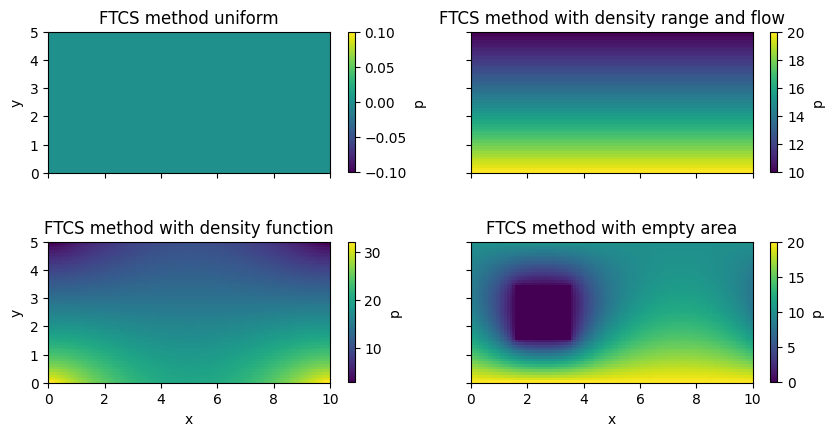

In [7]:
pin = np.zeros((nx + 2, ny + 2))
fig, ax = plt.subplots(2, 2,sharex=True, sharey=True, figsize=(10, 5))
result0 = FTCS(pin, initial_first, boundary_cond_first)
neg0 = ax[0][0].imshow(
    result0.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg0, ax=ax[0][0], location="right", anchor=(0, 0.5), shrink=0.8, label="p")
ax[0][0].set_title("FTCS method uniform")
ax[0][0].set_ylabel("y")

pin = np.zeros((nx + 2, ny + 2))
result1 = FTCS(pin, initial_second, boundary_cond_sec_third_fourth)
neg1 = ax[0][1].imshow(
    result1.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg1, ax=ax[0][1], anchor=(0, 0.5), shrink=0.8, label="p")
ax[0][1].set_title("FTCS method with density range and flow")


pin = np.zeros((nx + 2, ny + 2))
result2 = FTCS(pin, initial_third, boundary_cond_sec_third_fourth)
neg2 = ax[1][0].imshow(
    result2.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg2, ax=ax[1][0], anchor=(0, 0.5), shrink=0.8, label="p")
ax[1][0].set_title("FTCS method with density function")
ax[1][0].set_ylabel("y")
ax[1][0].set_xlabel("x")



pin = np.zeros((nx + 2, ny + 2))
result3 = FTCS_forth(pin, initial_forth, boundary_cond_sec_third_fourth)
#result3[15:35,15:35]=0

neg3 = ax[1][1].imshow(
    result3.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg3, ax=ax[1][1], anchor=(0, 0.5), shrink=0.8, label="p")
ax[1][1].set_title("FTCS method with empty area")
ax[1][1].set_xlabel("x")


plt.show()

# d)


 \begin{equation}
 \frac{4D\Delta t}{\Delta L^2}<1     \tag{4}
 \end{equation}

 


In [8]:
D=1
dt=0.001
dL=0.1

rez=4*D*dt/dL
print(rez)

0.04


In [9]:
def FTCS_stability(pzero, initial, boundary_cond):
    p = initial(pzero)
    p_old=np.zeros(np.shape(p))
    for n in range(nt):
        p = boundary_cond(p)
        # p_new = (
        #    p[1:-1, 1:-1]
        #    + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
        #    + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        # )
        # p[:] = p_new[:]
        p[1:-1, 1:-1] = (
            p[1:-1, 1:-1]
            + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
            + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        )
        if (np.linalg.norm(p - p_old) < 1e-8):
            break
        p_old=p
    return p

In [10]:
def FTCS_forth_stability(pzero, initial, boundary_cond):
    p = initial(pzero)
    p_new=np.zeros(np.shape(p))
    for n in range(nt):
        p = boundary_cond(p)
        p[1:-1, 1:-1] = (
            p[1:-1, 1:-1]
            + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
            + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        )
        if np.all(np.abs(p_new - p) < 1e-8):
            break
        p_new=p
        p=initial(p)
    return p

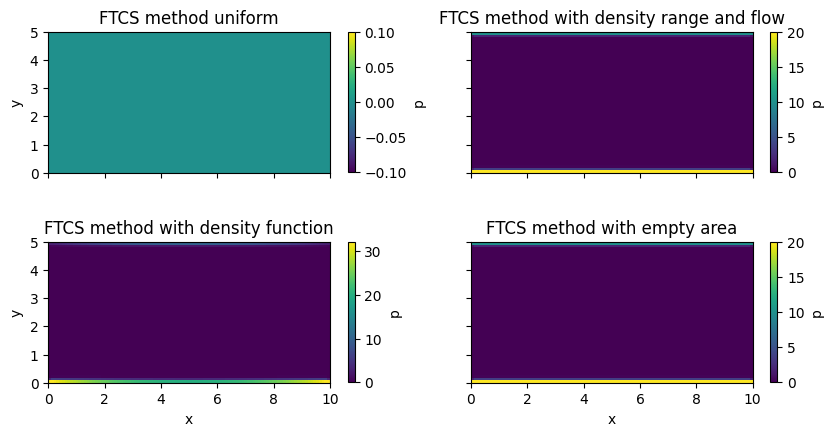

In [11]:
pin = np.zeros((nx + 2, ny + 2))
fig, ax = plt.subplots(2, 2,sharex=True, sharey=True, figsize=(10, 5))
result_0sta = FTCS_stability(pin, initial_first, boundary_cond_first)
neg0_sta = ax[0][0].imshow(
    result_0sta.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg0_sta, ax=ax[0][0], location="right", anchor=(0, 0.5), shrink=0.8, label="p")
ax[0][0].set_title("FTCS method uniform")
ax[0][0].set_ylabel("y")

pin = np.zeros((nx + 2, ny + 2))
result1_sta = FTCS_stability(pin, initial_second, boundary_cond_sec_third_fourth)
neg1_sta = ax[0][1].imshow(
    result1_sta.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg1_sta, ax=ax[0][1], anchor=(0, 0.5), shrink=0.8, label="p")
ax[0][1].set_title("FTCS method with density range and flow")


pin = np.zeros((nx + 2, ny + 2))
result2_sta = FTCS_stability(pin, initial_third, boundary_cond_sec_third_fourth)
neg2_sta = ax[1][0].imshow(
    result2_sta.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg2_sta, ax=ax[1][0], anchor=(0, 0.5), shrink=0.8, label="p")
ax[1][0].set_title("FTCS method with density function")
ax[1][0].set_ylabel("y")
ax[1][0].set_xlabel("x")



pin = np.zeros((nx + 2, ny + 2))
result3_sta = FTCS_forth_stability(pin, initial_forth, boundary_cond_sec_third_fourth)
#result3[15:35,15:35]=0

neg3_sta = ax[1][1].imshow(
    result3_sta.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg3_sta, ax=ax[1][1], anchor=(0, 0.5), shrink=0.8, label="p")
ax[1][1].set_title("FTCS method with empty area")
ax[1][1].set_xlabel("x")


plt.show()